In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

# Exploratory data Analysis

In [2]:
df = pd.read_csv('Customer Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


here total charges are in object type and we have to convert it into float 

In [5]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#now we will check the null values 

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#no null values

#getting the basic stats of the data

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#checking the duplicates 

In [9]:
df.duplicated().sum()

0

#here customerID column should have unique values so we will specifically check for duplicates in customerID column

In [10]:
df["customerID"].duplicated().sum()

0

#no duplicates here also

#also the senior_citizen column have 0 or 1 value which we will convert

In [11]:
def conv(value):
    if value ==1:
        return "Yes"
    else : 
        return "No"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)



In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#now we will se hte number of customers who have churned out

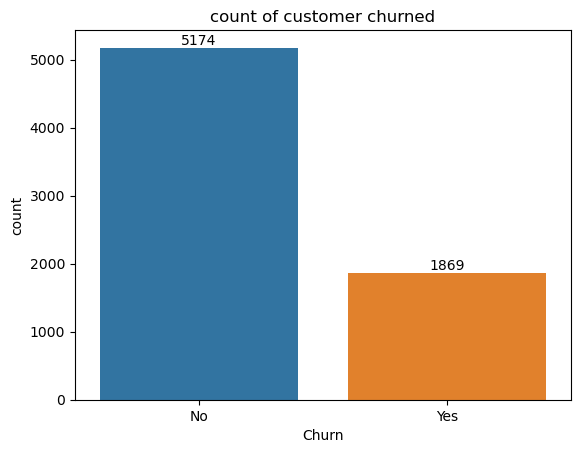

In [17]:
ax = sns.countplot(x = "Churn" , data = df) 
ax.bar_label(ax.containers[0])
plt.title("count of customer churned")
plt.show()

In [18]:
gb = df.groupby("Churn").agg({'Churn':"count"})

In [19]:
gb

,Churn
Churn,
No,5174
Yes,1869


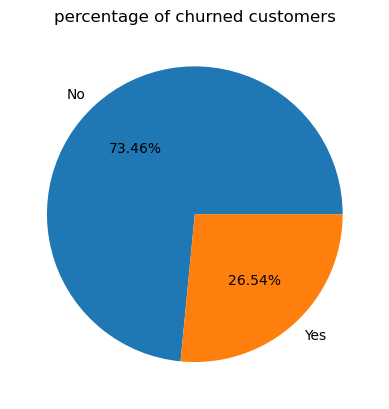

In [21]:
plt.pie(gb['Churn'] , labels = gb.index , autopct = "%1.2f%%")
plt.title("percentage of churned customers")
plt.show()

#now lets explore the reason of churning 

#so lets start by one by one factor 
firstly gender

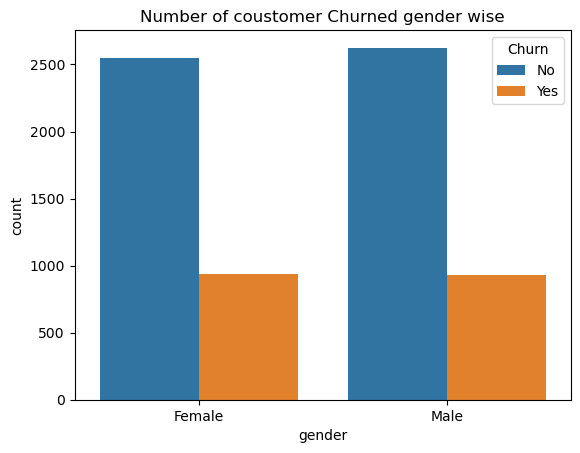

In [22]:
ax = sns.countplot(x = "gender" , data = df , hue = "Churn")
plt.title("Number of coustomer Churned gender wise")
plt.show()

#the count is same thus gender doesn't seems an important factor of churning

#lets check the churn impact in senior ctizen

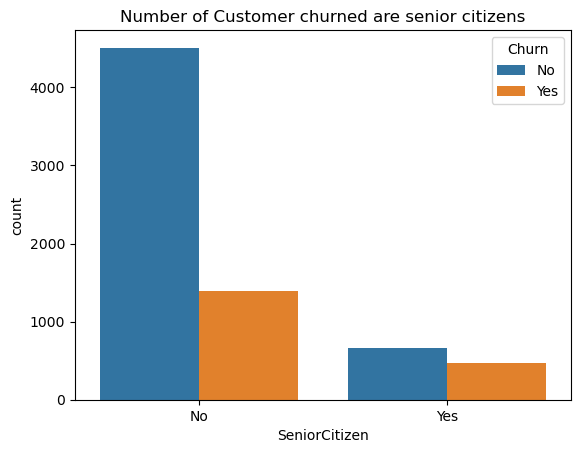

In [23]:
ax = sns.countplot(x = "SeniorCitizen" , data = df , hue = "Churn")
plt.title("Number of Customer churned are senior citizens")
plt.show()

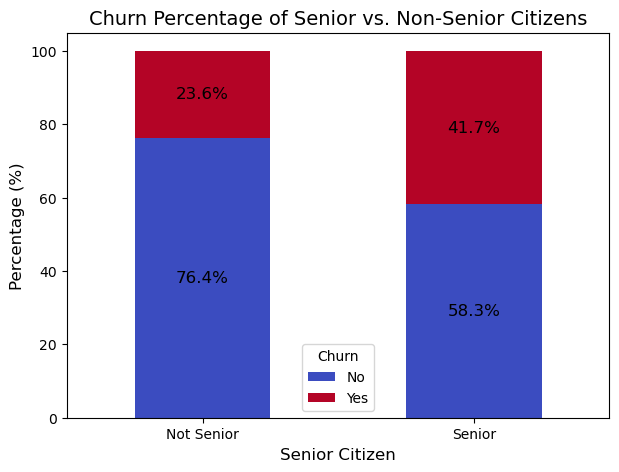

In [24]:
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Create stacked bar plot
ax = percent_data.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(7,5))

# Add percentage labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Avoid placing labels on zero-height bars
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f"{height:.1f}%",  # Formatting label as percentage
                ha="center",
                va="center",
                fontsize=12,
                color="black"
            )

# Labels and Title
plt.title("Churn Percentage of Senior vs. Non-Senior Citizens", fontsize=14)
plt.xlabel("Senior Citizen", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Not Senior", "Senior"], rotation=0)
plt.legend(title="Churn", labels=["No", "Yes"], loc="best")

# Show Plot
plt.show()

thus percentage wise seniorcitizens churned out more than the younger citizens

# let's check on the basis of tenure 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


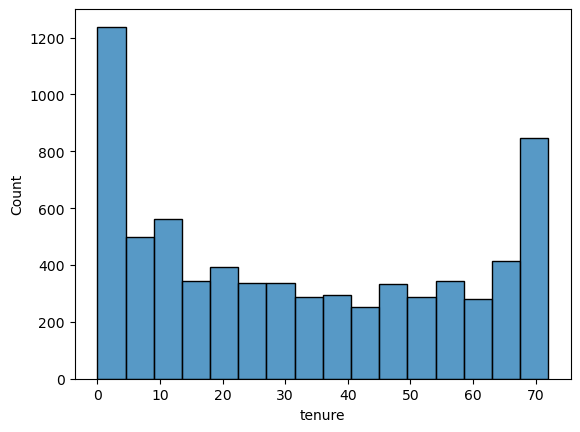

In [28]:
sns.histplot(x = 'tenure' , data = df)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


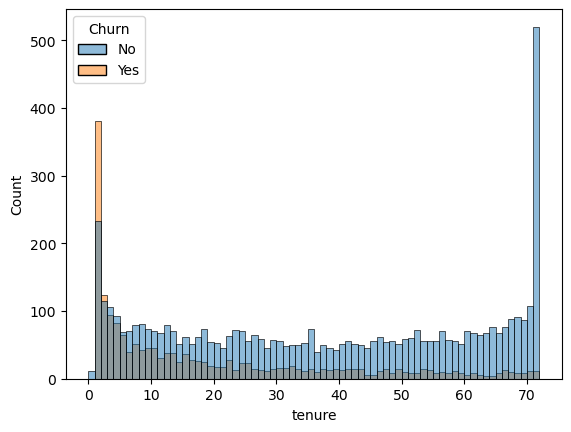

In [30]:
sns.histplot(x='tenure' , data = df , hue= 'Churn' , bins = 72)
plt.show()


people who have used the services for long time have stayed and people who used for 1 or 2 months have churned out

# let's check on basis of contract 

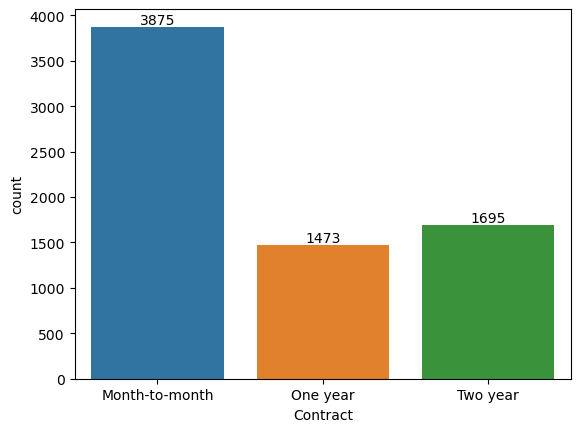

In [32]:
ax = sns.countplot(x = 'Contract' , data = df)
ax.bar_label(ax.containers[0])
plt.show()

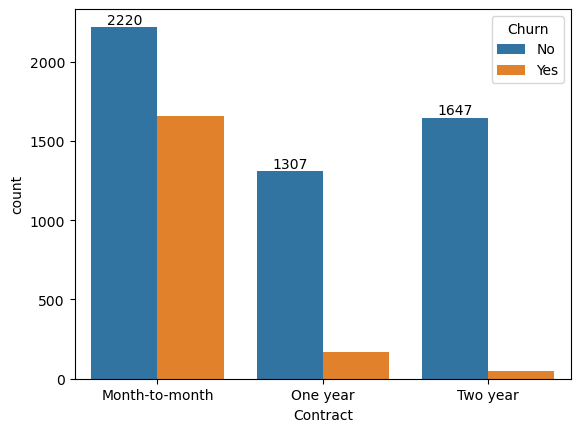

In [33]:
ax = sns.countplot(x = 'Contract' , data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.show()

people who have month to month contract are likely to churn then from those who have 1 or 2 year contract

# let's check the churn condition vary with diffrent service ofered by the company the offered services are "'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies'"

In [34]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

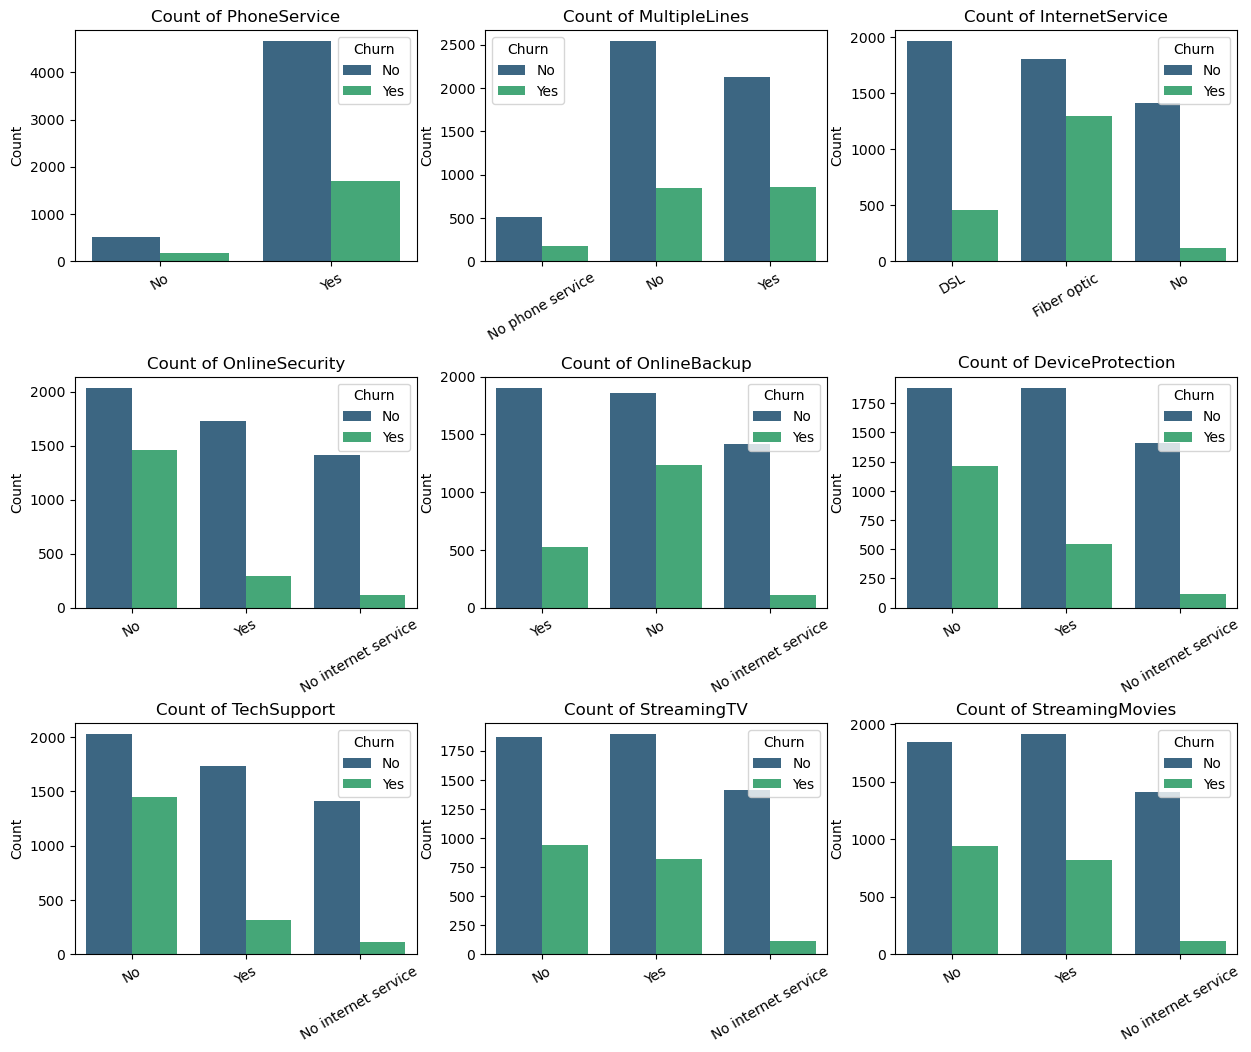

In [36]:

columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # 3x3 grid
fig.subplots_adjust(hspace=0.5)  # Space between plots

# Flatten the 2D axes array to 1D for easy iteration
axes = axes.flatten()

# Loop through each column and create a countplot
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], palette="viridis", hue = 'Churn')
    axes[i].set_title(f"Count of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=30)  # Rotate x-axis labels for readability

# Show the plot
plt.show()

Customers with no phone or internet services have lower churn rates, while those with Fiber Optic internet have a higher churn tendency.
Subscription to additional services like Online Security, Tech Support, and Streaming Services is linked to lower churn rates.
Customers with multiple lines and no additional security services appear to have a higher likelihood of churning

# let's check on basis of payment method

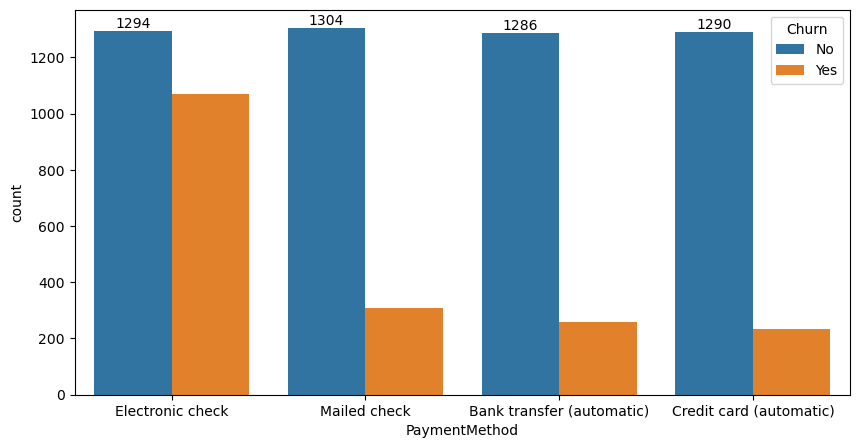

In [41]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'PaymentMethod' , data = df , hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.show()

churning is less in case of automatic transfer and customer is likely to churn when he is using electronis check as payment method

# let's get  insights through SQL also

let's create the customer_churn database in  MySql and transfer the table their 

In [4]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('Customer Churn.csv', 'customer_data'),
     # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='password123',
    database='customer_churn'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = r'C:\Users\hp\OneDrive\Desktop\customer_churn'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing Customer Churn.csv
NaN values before replacement:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64



In [13]:
import mysql.connector

db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "password123",
                            database = "customer_churn")

cur = db.cursor()


Connected MySql with jupyter notebook using abve connector now let's get the insights 

# 1) over all percentage of  churning 

In [16]:
query = """ with cte1 as (
            select count(*) cn from customer_data ),
            cte2 as (
            select count(*) cn1 from customer_data where Churn = 'Yes'
            )
            select (cte2.cn1/cte1.cn)*100 from cte2,cte1"""
cur.execute(query)

data = cur.fetchall()

data 
df = pd.DataFrame(data)
print("over all percentage of  churning is ", df.iloc[0,0],"%")

over all percentage of  churning is  26.5370 %


over all percentage of  churning is  26.5370 %

# 2) Churn Rate by Contract Type

In [17]:
query = """ with cte1 as (
            select count(*) cn from customer_churn.customer_data ),
            cte2 as (
            select count(*) cn1 , Contract from customer_churn.customer_data where Churn = 'Yes' 
            group by customer_churn.customer_data.Contract)
            
select (cte2.cn1/cte1.cn)*100 , cte2.contract from cte1, cte2"""
cur.execute(query)

data = cur.fetchall()

data 
df = pd.DataFrame(data , columns = ["churning_rate %","Contract_Type"])
df

,churning_rate %,Contract_Type
0,23.4985,Month-to-month
1,0.6815,Two year
2,2.3570,One year


Most churning is seen where contract type is month-to-month

# 3) Churn Rate by internet service Type

In [20]:
query = """ with cte1 as (
            select count(*) cn from customer_churn.customer_data ),
            cte2 as (
            select count(*) cn1 , 	InternetService from customer_churn.customer_data where Churn = 'Yes' 
            group by customer_churn.customer_data.InternetService)
            
select (cte2.cn1/cte1.cn)*100 , cte2.InternetService from cte1, cte2"""
cur.execute(query)

data = cur.fetchall()

data 
df = pd.DataFrame(data , columns = ["churning_rate %", "InternetService_Type"])
df

,churning_rate %,InternetService_Type
0,6.5171,DSL
1,18.4154,Fiber optic
2,1.6044,No


Most churning is seen where internet service  type is Fibre optic

# 4) churning by Monthly charges

In [21]:
query = """with cte1 as(
select count(customer_churn.customer_data.MonthlyCharges) count_where_Monthly_charge_less_then_50 , customer_churn.customer_data.Churn  churn 
from customer_churn.customer_data 
where customer_churn.customer_data.MonthlyCharges <=50 
group by customer_churn.customer_data.Churn),
cte2 as(
select count(customer_churn.customer_data.MonthlyCharges) count_where_Monthly_charge_greater_then_50 , customer_churn.customer_data.Churn churn  
from customer_churn.customer_data 
where customer_churn.customer_data.MonthlyCharges > 50 
group by customer_churn.customer_data.Churn) 

select cte2.count_where_Monthly_charge_greater_then_50, cte1.count_where_Monthly_charge_less_then_50 , cte1.churn from 
cte1 join cte2 
on cte1.churn = cte2.churn  """ 

cur.execute(query)

data = cur.fetchall()

data 
df = pd.DataFrame(data , columns = ["count_where_Monthly_charge_greater_then_50", "count_where_Monthly_charge_less_then_50","churn"])
df

,count_where_Monthly_charge_greater_then_50,count_where_Monthly_charge_less_then_50,churn
0,3236,1938,No
1,1508,361,Yes


it is seen that large number of customer do not churn whose monthly charges are less then 50 , but  in group of people who pay charges greater then 50 the comparision is not apppropriate as the large number of customers from that group does not churned out

# 5) Churn Rate by PaymentMethod

In [22]:
query = """ with cte1 as (
            select count(*) cn from customer_churn.customer_data ),
            cte2 as (
            select count(*) cn1 , 	PaymentMethod from customer_churn.customer_data where Churn = 'Yes' 
            group by customer_churn.customer_data.PaymentMethod)
            
select (cte2.cn1/cte1.cn)*100 , cte2.PaymentMethod from cte1, cte2"""
cur.execute(query)

data = cur.fetchall()

data 
df = pd.DataFrame(data , columns = ["churning_rate %", "PaymentMethod"])
df

,churning_rate %,PaymentMethod
0,4.3731,Mailed check
1,15.2066,Electronic check
2,3.6632,Bank transfer (automatic)
3,3.2941,Credit card (automatic)


churning in automatic payment method is less as compared to others 